<a href="https://colab.research.google.com/github/benedictdebrah/Campus-security/blob/main/Student%20Satisfaction%20with%20Security%20on%20Campus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction
This IPython Notebook presents the analysis and insights from our research study on campus security at Kwame Nkrumah University of Science and Technology (KNUST). The study includes valuable information collected from a comprehensive survey aimed at understanding KNUST students' perceptions and experiences related to campus security.


In [ ]:
#downloading necessary libraries
!pip install pandas matplotlib seaborn sklearn

In [2]:
#importing libraries for data mnipultion and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#calling our dataset
data = pd.read_csv('/content/Survey Responses_final.csv')

In [4]:
#Knowing more about our dataset
print('Our dataset contains',data.shape)

Our dataset contains (416, 17)


### Data Cleaning

In [5]:
data.head(5)

,Have you ever experienced any security incidents on campus?\n,"On a scale of 1 to 5, please rate your overall satisfaction with the campus security services.\n",How safe do you feel when walking alone on campus during the day?,How safe do you feel when walking alone on campus during the night?,Are you currently residing on-campus or off-campus?\n,"Are there any areas on campus where you feel security measures should be improved? If yes, please specify.\n",Are you aware of the emergency procedures and protocols in case of a security threat or emergency situation?\n,How would you rate the visibility and availability of security personnel on campus,Have you ever reported a security concern or incident to the campus security authorities?,"If you answered ""Yes"" to the previous question, how satisfied were you with the response and actions taken?\n",Do you think the campus security measures are sufficient to prevent and respond to potential threats or incidents?,Rate the campus communication and dissemination of security-related information.,Do you have any suggestions or ideas for improving campus security?,What is your gender?,May we kindly request your email address in order to share the research findings with you?,Submitted At,Token
0,Yes,3 - Neutral,Very safe,Neutral,On-campus,Bomso area,"No, I am not aware",Poor,Yes,Satisfied,"No, I do not think the campus security measure...",Neutral,There should be security checkpoints around ca...,Male,paaopuni@gmail.com,7/3/2023 9:36:41,bzvybs7diae4yvxt1pgdbzvybnp3om2c
1,Yes,4 - Satisfied,Very safe,Neutral,Off-campus?,Yes. The road from the administration’s rounda...,"No, I am not aware",Good,Yes,Satisfied,"Yes, I think the campus security measures are ...",Good,NaN,Male,mr.acheampong50@gmail.com,7/3/2023 9:45:23,lfnvyby5100bx2e4hlfnecnc04fl0vq9
2,No,4 - Satisfied,Unsafe,Unsafe,Off-campus?,No,"No, I am not aware",Neutral,No,Neutral,I have not experienced any potential threats o...,Neutral,No,Male,No,7/3/2023 9:50:37,yeafubf5kkbayeafp4kce42sllx5veo5
3,No,3 - Neutral,Safe,Safe,Off-campus?,No,"Yes, I am fully aware",Neutral,No,NaN,I have not experienced any potential threats o...,Neutral,NaN,Male,Nkyiboafo100@gmail.com,7/3/2023 9:57:44,2r75h30728ao9azrd2r75znxtdamkkcw
4,No,4 - Satisfied,Safe,Safe,On-campus,No,I am somewhat aware,Good,No,NaN,I have not experienced any potential threats o...,Good,No,Male,domjboat77@gmail.com,7/3/2023 10:17:13,svhf74aguoieos57svhf74gqcydatqfp


In [6]:
data.columns

Index(['Have you ever experienced any security incidents on campus?\n',
       'On a scale of 1 to 5, please rate your overall satisfaction with the campus security services.\n',
       ' How safe do you feel when walking alone on campus during the day?',
       'How safe do you feel when walking alone on campus during the night?',
       ' Are you currently residing on-campus or off-campus?\n',
       'Are there any areas on campus where you feel security measures should be improved? If yes, please specify.\n',
       'Are you aware of the emergency procedures and protocols in case of a security threat or emergency situation?\n',
       'How would you rate the visibility and availability of security personnel on campus',
       'Have you ever reported a security concern or incident to the campus security authorities?',
       ' If you answered "Yes" to the previous question, how satisfied were you with the response and actions taken?\n',
       'Do you think the campus security measur

In [7]:
# renaming columns and making it simpler for our analysis

column_mapping = {
    'Have you ever experienced any security incidents on campus?\n': 'Experienced_Incidents',
    'On a scale of 1 to 5, please rate your overall satisfaction with the campus security services.\n': 'Satisfaction_Rating',
    ' How safe do you feel when walking alone on campus during the day?': 'Safety_Day_Walking',
    'How safe do you feel when walking alone on campus during the night?': 'Safety_Night_Walking',
    ' Are you currently residing on-campus or off-campus?\n': 'Residence_Status',
    'Are there any areas on campus where you feel security measures should be improved? If yes, please specify.\n': 'Improvement_Areas',
    'Are you aware of the emergency procedures and protocols in case of a security threat or emergency situation?\n': 'Aware_Emergency_Protocols',
    'How would you rate the visibility and availability of security personnel on campus': 'Visibility_Security_Personnel',
    'Have you ever reported a security concern or incident to the campus security authorities?': 'Reported_Incident',
    ' If you answered "Yes" to the previous question, how satisfied were you with the response and actions taken?\n': 'Response_Satisfaction',
    'Do you think the campus security measures are sufficient to prevent and respond to potential threats or incidents?': 'Sufficient_Security_Measures',
    'Rate the campus communication and dissemination of security-related information.': 'Communication_Rating',
    'Do you have any suggestions or ideas for improving campus security?': 'Suggestions',
    'What is your gender?': 'Gender',
    'May we kindly request your email address in order to share the research findings with you?': 'Email_Address',
    'Submitted At': 'Submitted_At',
    'Token': 'Token'
}

data.rename(columns=column_mapping, inplace=True)




In [8]:
data.head(5)

,Experienced_Incidents,Satisfaction_Rating,Safety_Day_Walking,Safety_Night_Walking,Residence_Status,Improvement_Areas,Aware_Emergency_Protocols,Visibility_Security_Personnel,Reported_Incident,Response_Satisfaction,Sufficient_Security_Measures,Communication_Rating,Suggestions,Gender,Email_Address,Submitted_At,Token
0,Yes,3 - Neutral,Very safe,Neutral,On-campus,Bomso area,"No, I am not aware",Poor,Yes,Satisfied,"No, I do not think the campus security measure...",Neutral,There should be security checkpoints around ca...,Male,paaopuni@gmail.com,7/3/2023 9:36:41,bzvybs7diae4yvxt1pgdbzvybnp3om2c
1,Yes,4 - Satisfied,Very safe,Neutral,Off-campus?,Yes. The road from the administration’s rounda...,"No, I am not aware",Good,Yes,Satisfied,"Yes, I think the campus security measures are ...",Good,NaN,Male,mr.acheampong50@gmail.com,7/3/2023 9:45:23,lfnvyby5100bx2e4hlfnecnc04fl0vq9
2,No,4 - Satisfied,Unsafe,Unsafe,Off-campus?,No,"No, I am not aware",Neutral,No,Neutral,I have not experienced any potential threats o...,Neutral,No,Male,No,7/3/2023 9:50:37,yeafubf5kkbayeafp4kce42sllx5veo5
3,No,3 - Neutral,Safe,Safe,Off-campus?,No,"Yes, I am fully aware",Neutral,No,NaN,I have not experienced any potential threats o...,Neutral,NaN,Male,Nkyiboafo100@gmail.com,7/3/2023 9:57:44,2r75h30728ao9azrd2r75znxtdamkkcw
4,No,4 - Satisfied,Safe,Safe,On-campus,No,I am somewhat aware,Good,No,NaN,I have not experienced any potential threats o...,Good,No,Male,domjboat77@gmail.com,7/3/2023 10:17:13,svhf74aguoieos57svhf74gqcydatqfp


In [9]:
#Using this colums for our analysis
df = data[['Experienced_Incidents', 'Satisfaction_Rating', 'Safety_Day_Walking',
       'Safety_Night_Walking', 'Residence_Status',
       'Aware_Emergency_Protocols', 'Visibility_Security_Personnel',
       'Reported_Incident', 'Response_Satisfaction',
       'Sufficient_Security_Measures', 'Communication_Rating',
       'Gender']]

In [10]:
#performing changes to the responses and making it approprite for analysis (Satisfaction_Rating	)
df.Satisfaction_Rating.unique()


array(['3 - Neutral', '4 - Satisfied', '2 - Dissatisfied',
       '1 - Very dissatisfied', '5 - Very satisfied'], dtype=object)

In [11]:
# Split the 'Satisfaction_Rating' column into 'Rating_Number' and 'Rating_Label'
df[['Satisfaction_Rating_Number', 'Satisfaction_Rating']] = df['Satisfaction_Rating'].str.split(' - ', expand=True)

df.drop(columns=['Satisfaction_Rating_Number'], inplace=True)



<ipython-input-11-def1616aa4c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Satisfaction_Rating_Number', 'Satisfaction_Rating']] = df['Satisfaction_Rating'].str.split(' - ', expand=True)
<ipython-input-11-def1616aa4c7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Satisfaction_Rating_Number'], inplace=True)


In [12]:
df.head()

,Experienced_Incidents,Satisfaction_Rating,Safety_Day_Walking,Safety_Night_Walking,Residence_Status,Aware_Emergency_Protocols,Visibility_Security_Personnel,Reported_Incident,Response_Satisfaction,Sufficient_Security_Measures,Communication_Rating,Gender
0,Yes,Neutral,Very safe,Neutral,On-campus,"No, I am not aware",Poor,Yes,Satisfied,"No, I do not think the campus security measure...",Neutral,Male
1,Yes,Satisfied,Very safe,Neutral,Off-campus?,"No, I am not aware",Good,Yes,Satisfied,"Yes, I think the campus security measures are ...",Good,Male
2,No,Satisfied,Unsafe,Unsafe,Off-campus?,"No, I am not aware",Neutral,No,Neutral,I have not experienced any potential threats o...,Neutral,Male
3,No,Neutral,Safe,Safe,Off-campus?,"Yes, I am fully aware",Neutral,No,NaN,I have not experienced any potential threats o...,Neutral,Male
4,No,Satisfied,Safe,Safe,On-campus,I am somewhat aware,Good,No,NaN,I have not experienced any potential threats o...,Good,Male


In [13]:
#accessing the column (Sufficient_Security_Measures	) to get overview of the responses
df['Sufficient_Security_Measures'].unique()

array(['No, I do not think the campus security measures are sufficient.',
       'Yes, I think the campus security measures are sufficient.',
       'I have not experienced any potential threats or incidents to make an assessment.',
       'I am not sure.', 'Other (please specify)'], dtype=object)

In [14]:
#
df['Residence_Status'].unique()

array(['On-campus', 'Off-campus?'], dtype=object)

In [15]:
df['Residence_Status'].replace('Off-campus?', 'Off-campus', inplace=True)


<ipython-input-15-a0510edec70d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Residence_Status'].replace('Off-campus?', 'Off-campus', inplace=True)


In [16]:
df['Residence_Status'].unique()

array(['On-campus', 'Off-campus'], dtype=object)

In [17]:
df.head()

,Experienced_Incidents,Satisfaction_Rating,Safety_Day_Walking,Safety_Night_Walking,Residence_Status,Aware_Emergency_Protocols,Visibility_Security_Personnel,Reported_Incident,Response_Satisfaction,Sufficient_Security_Measures,Communication_Rating,Gender
0,Yes,Neutral,Very safe,Neutral,On-campus,"No, I am not aware",Poor,Yes,Satisfied,"No, I do not think the campus security measure...",Neutral,Male
1,Yes,Satisfied,Very safe,Neutral,Off-campus,"No, I am not aware",Good,Yes,Satisfied,"Yes, I think the campus security measures are ...",Good,Male
2,No,Satisfied,Unsafe,Unsafe,Off-campus,"No, I am not aware",Neutral,No,Neutral,I have not experienced any potential threats o...,Neutral,Male
3,No,Neutral,Safe,Safe,Off-campus,"Yes, I am fully aware",Neutral,No,NaN,I have not experienced any potential threats o...,Neutral,Male
4,No,Satisfied,Safe,Safe,On-campus,I am somewhat aware,Good,No,NaN,I have not experienced any potential threats o...,Good,Male


In [18]:
df['Residence_Status'].value_counts()

On-campus     238
Off-campus    178
Name: Residence_Status, dtype: int64

### Data Analysis

In [19]:
df.dtypes

Experienced_Incidents            object
Satisfaction_Rating              object
Safety_Day_Walking               object
Safety_Night_Walking             object
Residence_Status                 object
Aware_Emergency_Protocols        object
Visibility_Security_Personnel    object
Reported_Incident                object
Response_Satisfaction            object
Sufficient_Security_Measures     object
Communication_Rating             object
Gender                           object
dtype: object

<ipython-input-20-b5dae3b7210d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Experienced_Incidents'] = df['Experienced_Incidents'].map({'Yes': 1, 'No': 0})


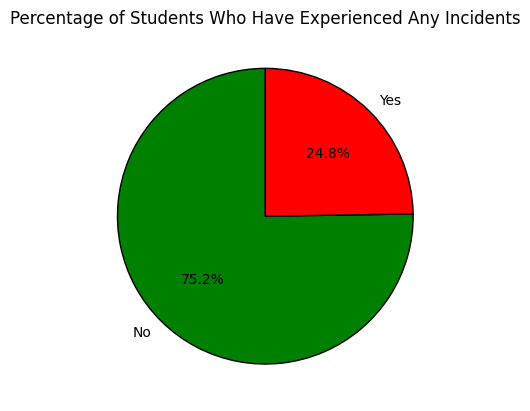

In [20]:
# Assuming 1 for 'Yes' and 0 for 'No'
df['Experienced_Incidents'] = df['Experienced_Incidents'].map({'Yes': 1, 'No': 0})

# Calculate the counts for 'Yes' and 'No'
counts = df['Experienced_Incidents'].value_counts()

colors = ['green', 'red']

# Plot the pie chart
plt.pie(counts, labels=counts.index.map({1: 'Yes', 0: 'No'}), autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'},colors=colors)

# Set the title of the pie chart
plt.title('Percentage of Students Who Have Experienced Any Incidents')

# Show the pie chart
plt.show()


In [21]:
# Get unique values for each column
unique_values = {}
for column in df.columns:
    unique_values[column] = df[column].unique()

# Print the unique values for each column
for column, values in unique_values.items():
    print(f"Unique values in '{column}' column:")
    print(values)

Unique values in 'Experienced_Incidents' column:
[1 0]
Unique values in 'Satisfaction_Rating' column:
['Neutral' 'Satisfied' 'Dissatisfied' 'Very dissatisfied' 'Very satisfied']
Unique values in 'Safety_Day_Walking' column:
['Very safe' 'Unsafe' 'Safe' 'Neutral' 'Very unsafe']
Unique values in 'Safety_Night_Walking' column:
['Neutral' 'Unsafe' 'Safe' 'Very safe' 'Very unsafe']
Unique values in 'Residence_Status' column:
['On-campus' 'Off-campus']
Unique values in 'Aware_Emergency_Protocols' column:
['No, I am not aware' 'Yes, I am fully aware' 'I am somewhat aware']
Unique values in 'Visibility_Security_Personnel' column:
['Poor' 'Good' 'Neutral' 'Very Poor' 'Very Good']
Unique values in 'Reported_Incident' column:
['Yes' 'No']
Unique values in 'Response_Satisfaction' column:
['Satisfied' 'Neutral' nan 'Dissatisfied' 'Very Dissatisfied'
 'Very Satisfied']
Unique values in 'Sufficient_Security_Measures' column:
['No, I do not think the campus security measures are sufficient.'
 'Yes, I 

In [22]:
categorical_cols = ['Satisfaction_Rating', 'Aware_Emergency_Protocols', 'Visibility_Security_Personnel',
                    'Reported_Incident', 'Sufficient_Security_Measures', 'Communication_Rating', 'Gender']

df[categorical_cols] = df[categorical_cols].astype('category')

<ipython-input-22-c5e08c030198>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_cols] = df[categorical_cols].astype('category')


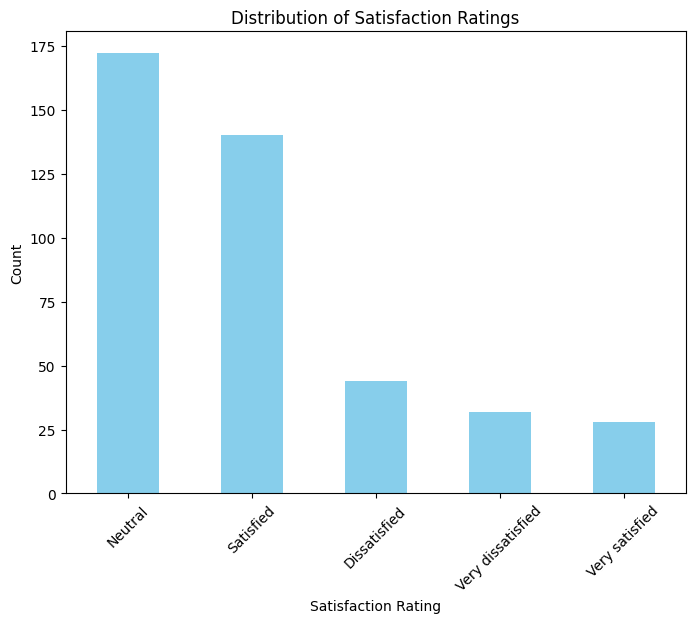

In [23]:
# chart for the distribution of Satisfaction_Rating
plt.figure(figsize=(8, 6))
df['Satisfaction_Rating'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Count')
plt.title('Distribution of Satisfaction Ratings')
plt.xticks(rotation=45)
plt.show()

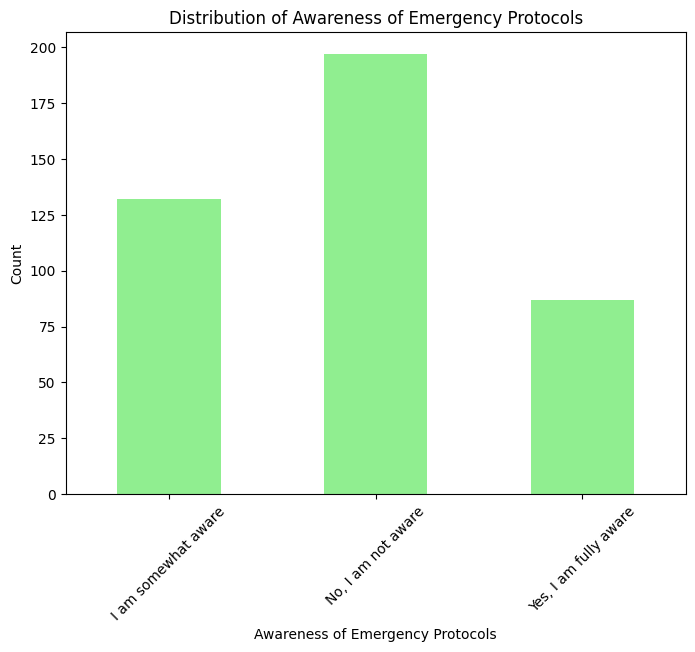

In [24]:
# 2. Plot a bar chart for the distribution of Awareness of Emergency Protocols
plt.figure(figsize=(8, 6))
df['Aware_Emergency_Protocols'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.xlabel('Awareness of Emergency Protocols')
plt.ylabel('Count')
plt.title('Distribution of Awareness of Emergency Protocols')
plt.xticks(rotation=45)
plt.show()


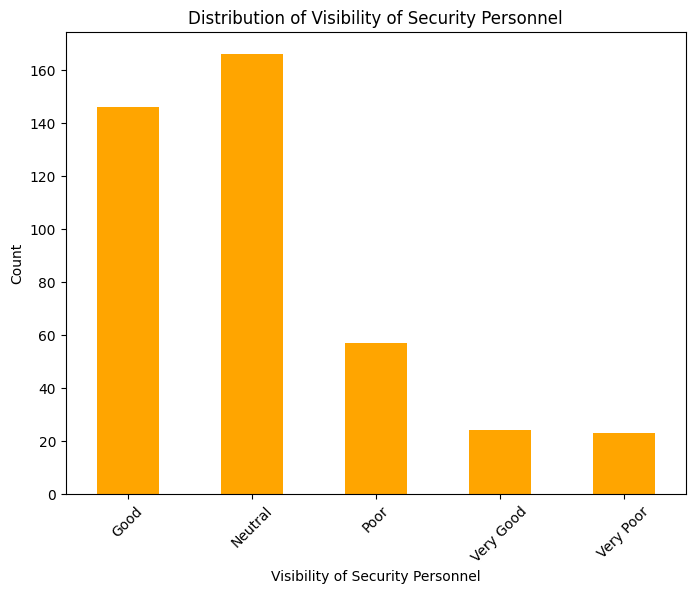

In [25]:
# 3. Plot a bar chart for the distribution of Visibility of Security Personnel
plt.figure(figsize=(8, 6))
df['Visibility_Security_Personnel'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.xlabel('Visibility of Security Personnel')
plt.ylabel('Count')
plt.title('Distribution of Visibility of Security Personnel')
plt.xticks(rotation=45)
plt.show()

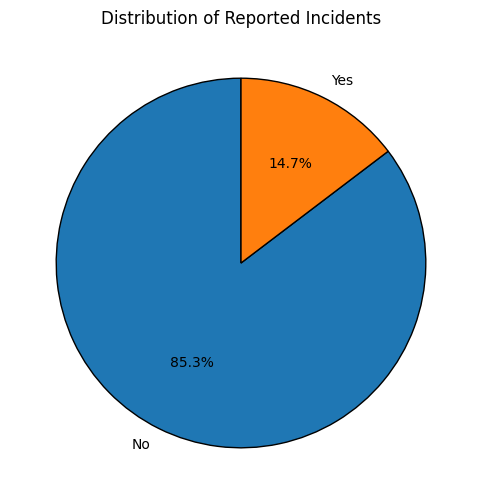

In [26]:
# 4. Plot a pie chart for the distribution of Reported Incidents
plt.figure(figsize=(6, 6))
reported_incidents_counts = df['Reported_Incident'].value_counts()
plt.pie(reported_incidents_counts, labels=reported_incidents_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Reported Incidents')
plt.show()

In [27]:

df['Sufficient_Security_Measures'].value_counts()



I have not experienced any potential threats or incidents to make an assessment.    141
I am not sure.                                                                       91
No, I do not think the campus security measures are sufficient.                      90
Yes, I think the campus security measures are sufficient.                            87
Other (please specify)                                                                7
Name: Sufficient_Security_Measures, dtype: int64

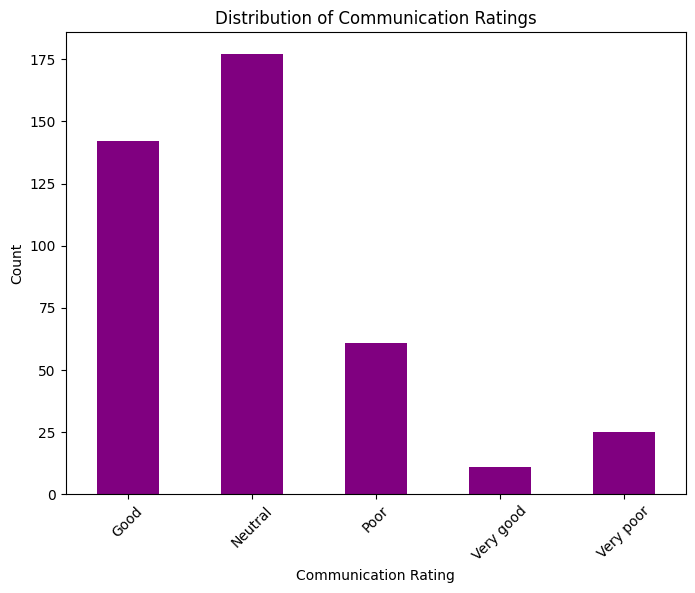

In [28]:
# 6. Plot a bar chart for the distribution of Communication Rating
plt.figure(figsize=(8, 6))
df['Communication_Rating'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.xlabel('Communication Rating')
plt.ylabel('Count')
plt.title('Distribution of Communication Ratings')
plt.xticks(rotation=45)
plt.show()

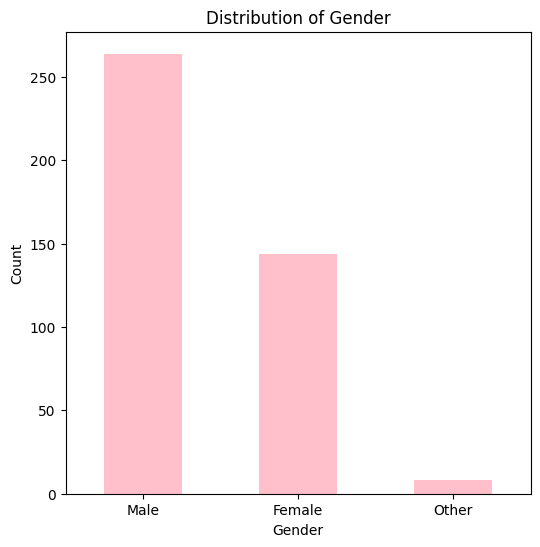

In [29]:
# 7. Plot a bar chart for the distribution of Gender
plt.figure(figsize=(6, 6))
df['Gender'].value_counts().plot(kind='bar', color='pink')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.xticks(rotation=0)
plt.show()

In [30]:
# Creating a function to generate the table for each categorical column
def create_summary_table(column_name):
    value_counts = df[column_name].value_counts()
    total_count = len(df[column_name])
    percentages = (value_counts / total_count) * 100
    table_data = {
        'Category': value_counts.index,
        'Count': value_counts.values,
        'Percentage (%)': percentages.values
    }
    summary_table = pd.DataFrame(table_data)
    return summary_table




In [31]:
# Create and display the summary table for each column
for col in categorical_cols:
    print(f"Summary table for '{col}':")
    print(create_summary_table(col))
    print()

Summary table for 'Satisfaction_Rating':
            Category  Count  Percentage (%)
0            Neutral    172       41.346154
1          Satisfied    140       33.653846
2       Dissatisfied     44       10.576923
3  Very dissatisfied     32        7.692308
4     Very satisfied     28        6.730769

Summary table for 'Aware_Emergency_Protocols':
                Category  Count  Percentage (%)
0     No, I am not aware    197       47.355769
1    I am somewhat aware    132       31.730769
2  Yes, I am fully aware     87       20.913462

Summary table for 'Visibility_Security_Personnel':
    Category  Count  Percentage (%)
0    Neutral    166       39.903846
1       Good    146       35.096154
2       Poor     57       13.701923
3  Very Good     24        5.769231
4  Very Poor     23        5.528846

Summary table for 'Reported_Incident':
  Category  Count  Percentage (%)
0       No    355       85.336538
1      Yes     61       14.663462

Summary table for 'Sufficient_Security_Measu

### Statiscal Test



In [32]:
from scipy.stats import chi2_contingency


**The Chi-Square test** of independence is used to determine if there is a significant relationship between two nominal (categorical) variables. The frequency of each category for one nominal variable is compared across the categories of the second nominal variable.

In [33]:
# Performing Chi-square test for each pair of categorical variables (ignoring null values)
for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 != col2:
            # Drop rows with null values in the two columns
            contingency_table = pd.crosstab(df[col1].dropna(), df[col2].dropna())
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            print(f"Chi-square test for independence between '{col1}' and '{col2}':")
            print(f"Chi-square statistic: {chi2}")
            print(f"P-value: {p}")
            if p < 0.05:
                print("There is a statistically significant relationship between the two variables.")
            else:
                print("There is no statistically significant relationship between the two variables.")
            print()

Chi-square test for independence between 'Satisfaction_Rating' and 'Aware_Emergency_Protocols':
Chi-square statistic: 14.272099538111366
P-value: 0.07494317002723867
There is no statistically significant relationship between the two variables.

Chi-square test for independence between 'Satisfaction_Rating' and 'Visibility_Security_Personnel':
Chi-square statistic: 182.48511757672333
P-value: 2.6733768805962628e-30
There is a statistically significant relationship between the two variables.

Chi-square test for independence between 'Satisfaction_Rating' and 'Reported_Incident':
Chi-square statistic: 20.238427569541606
P-value: 0.00044807980679080814
There is a statistically significant relationship between the two variables.

Chi-square test for independence between 'Satisfaction_Rating' and 'Sufficient_Security_Measures':
Chi-square statistic: 72.69021106740247
P-value: 3.3563460415777614e-09
There is a statistically significant relationship between the two variables.

Chi-square test 

### Analysis on suggestions and feedbacks

In [38]:
data['Suggestions'].fillna('No', inplace=True)
data['Improvement_Areas'].fillna('No', inplace=True)

# Verify the changes
print(data[['Suggestions', 'Improvement_Areas']])

                                           Suggestions  \
0    There should be security checkpoints around ca...   
1                                                   No   
2                                                   No   
3                                                   No   
4                                                   No   
..                                                 ...   
411                                                 No   
412                                                 No   
413                                                 No   
414                                                 No   
415                                                 No   

                                     Improvement_Areas  
0                                           Bomso area  
1    Yes. The road from the administration’s rounda...  
2                                                   No  
3                                                   No  
4                 

In [39]:
data[['Suggestions','Improvement_Areas']]

,Suggestions,Improvement_Areas
0,There should be security checkpoints around ca...,Bomso area
1,No,Yes. The road from the administration’s rounda...
2,No,No
3,No,No
4,No,No
...,...,...
411,No,The road from administration to Brunei complex...
412,No,Commercial area
413,No,None
414,No,Ayeduase


In [40]:
data['Suggestions'].unique()

array(['There should be security checkpoints around campus', 'No',
       'Security should be around every ten minutes walk',
       'increase security at night to better protect the student it seems the securities are dorminat in the day and recessive at night',
       'Nerhh', 'there needs to be more security cameras',
       'Campus security is better buh off campus security is very threatening',
       'More security guards and light poles', 'Not really',
       'Recruiting more security persons',
       'Some security personnel should be assigned to place like Boadi medical village',
       'More can be done', 'no please',
       'The cameras should be at vantage points',
       'They should do their proper best', 'More sucurity persons needed',
       'This will help provide a serene atmosphere for students on and off campus',
       'They should be everywhere',
       'More security personnel at vantage points with capable security weapons at disposal. And also increasing street